# I. Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## II. Chargement du fichier bronze.csv

In [2]:
data_path = pd.read_csv('../data/bronze.csv')
df = data_path

# III. Analyse exploratoire des données

In [3]:
# Affichage de toutes les colonnes
pd.set_option('display.max_columns', None)
# Aperçu des données
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Informations générales sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistiques descriptives
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# IV. Nettoyage du dataset

## A. Suppression des doublons

In [6]:
df.drop_duplicates(inplace=True)

 ## B. Traitement des valeurs manquantes

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Vérifier si chaque ligne contient des espaces vides
rows_with_empty_values = df.apply(lambda row: (row == " ").any(), axis=1)

# Filtrer le DataFrame pour n'afficher que les lignes contenant des espaces vides
df_empty_values = df[rows_with_empty_values]

# Afficher les lignes contenant des espaces vides
df_empty_values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
# On supprime les lignes contenant des espaces vides
df.drop(df_empty_values.index, inplace=True)

## C. Conversion des types de données

In [10]:
# Convertir la colonne 'SeniorCitizen' en type booléen pour une meilleure interprétation des données
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

# Convertir la colonne 'TotalCharges' en type float pour effectuer des opérations numériques
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## D. Inspecter les valeurs uniques de chaque colonne catégorielle

In [11]:
# Afficher les valeurs uniques pour chaque colonne catégorielle
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' , 'SeniorCitizen'
]
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']
SeniorCitizen: [False  True]


## E. Identifier les valeurs aberrantes dans les colonnes numériques

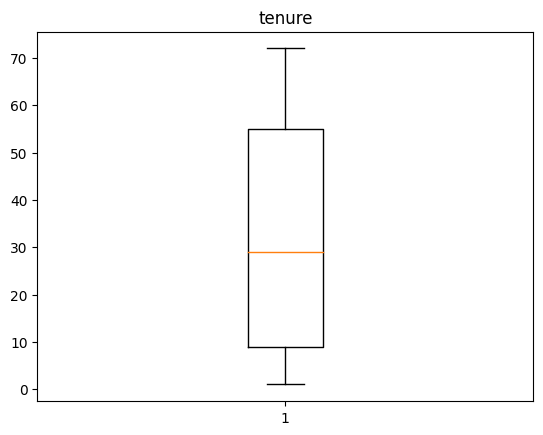

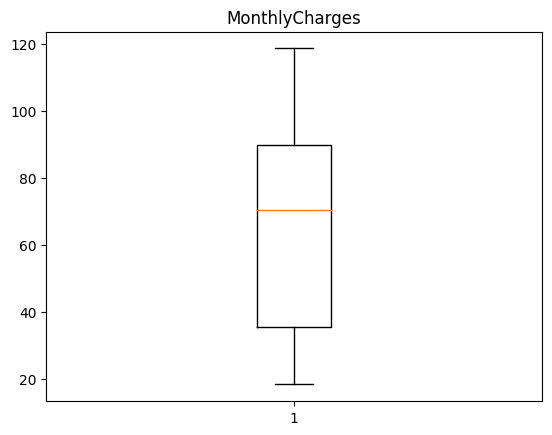

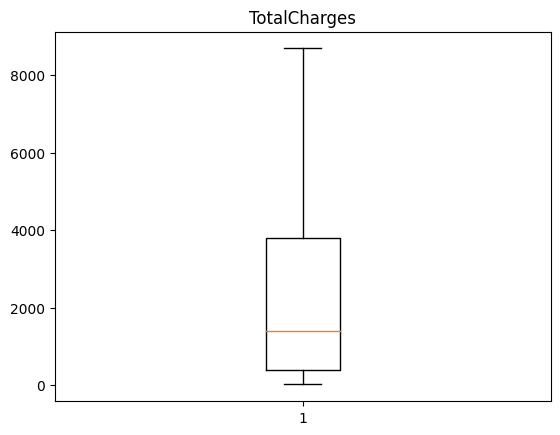

In [12]:
# Afficher un boxplot pour chaque colonne numérique
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_columns:
    # On supprime les valeurs nulles pour éviter les erreurs
    plt.boxplot(df[col].dropna())
    plt.title(col)
    plt.show()

In [13]:
# Afficher les statistiques descriptives pour chaque colonne numérique
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_columns:
    print(f"\nStatistiques descriptives pour la colonne {col}:")
    print(df[col].describe())


Statistiques descriptives pour la colonne tenure:
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Statistiques descriptives pour la colonne MonthlyCharges:
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

Statistiques descriptives pour la colonne TotalCharges:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


**tenure** : La durée minimale est de 1 mois et la durée maximale est de 72 mois (6 ans). Les valeurs se situent dans un intervalle raisonnable et aucune valeur aberrante n'est détectée.

**MonthlyCharges** : Les frais mensuels vont de 18,25 à 118,75. Bien qu'il y ait une certaine variation dans les charges mensuelles, la plage est plausible pour les coûts de services de télécommunication et ne semble pas contenir de valeurs aberrantes.

**TotalCharges** : Les charges totales vont de 18,8 à 8684,8. Cette plage est également plausible compte tenu de la durée et des frais mensuels des clients. Aucune valeur aberrante n'est détectée.

Il semble que les données soient plutôt cohérentes et ne contiennent pas de valeurs aberrantes évidentes dans les colonnes numériques. 

# V. Enregistrement du dataset nettoyé

In [14]:
# Enregistrer le DataFrame nettoyé
df.to_csv('../data/silver.csv', index=False)